In [8]:
from google.colab import files
uploaded =files.upload()

Saving Stud.csv to Stud (2).csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('Stud.csv')
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writting_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [11]:
student_data=pd.read_csv("Stud.csv")
print(student_data.head())


   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writting_score  
0                    none          72             72              74  
1               completed          69             90              88  
2                    none          90             95              93  
3                    none          47             57              44  
4                    none          76             78              75  


In [12]:
student_data.shape

(1000, 8)

In [13]:
student_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writting_score               1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
student_data['gender'] = student_data['gender'].fillna(student_data['gender'].mode()[0])
print(student_data.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writting_score  
0                    none          72             72              74  
1               completed          69             90              88  
2                    none          90             95              93  
3                    none          47             57              44  
4                    none          76             78              75  


In [15]:
student_data['lunch'].str.upper()

,lunch
0,STANDARD
1,STANDARD
2,STANDARD
3,FREE/REDUCED
4,STANDARD
...,...
995,STANDARD
996,FREE/REDUCED
997,FREE/REDUCED
998,STANDARD


In [16]:
student_data.describe()


,math_score,reading_score,writting_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
student_data.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writting_score,0


In [18]:
student_data.groupby("gender")["math_score"].sum()

,math_score
gender,
female,32962
male,33127


In [19]:
student_data.groupby("gender")["math_score"].mean()


,math_score
gender,
female,63.633205
male,68.728216


In [20]:
student_data["test_preparation_course"].value_counts()


,count
test_preparation_course,
none,642
completed,358


In [21]:
testing_level=student_data.groupby("race_ethnicity")["math_score"].sum()

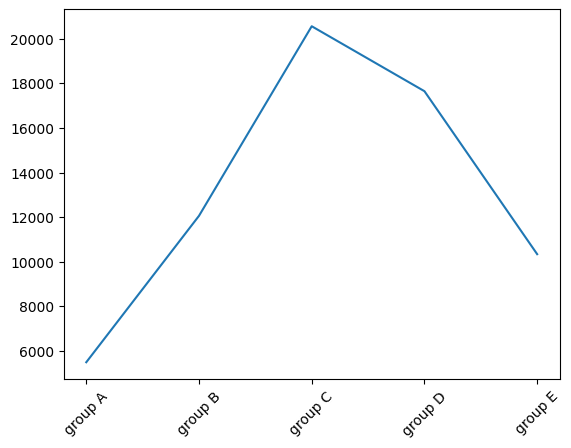

In [22]:
plt.plot(testing_level.index,testing_level.values)
plt.xticks(rotation=45)
plt.show()

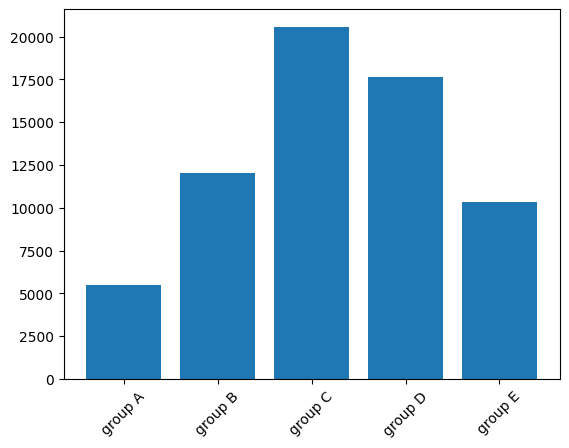

In [23]:
plt.bar(testing_level.index,testing_level.values)
plt.xticks(rotation=45)
plt.show()

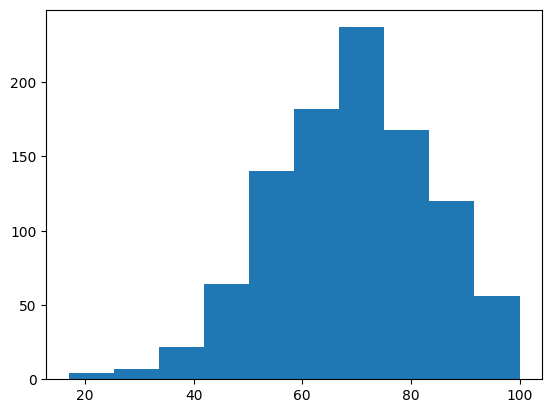

In [24]:
plt.hist(student_data["reading_score"])
plt.show()

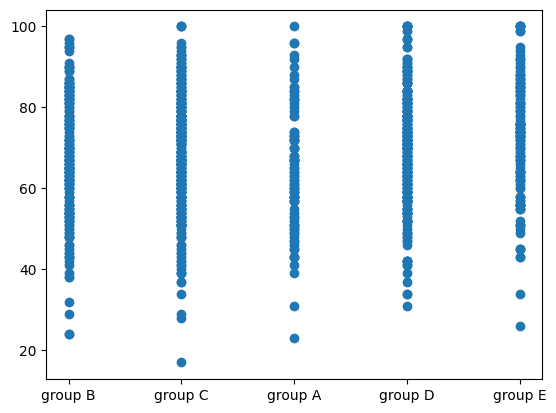

In [25]:
plt.scatter(student_data["race_ethnicity"],student_data["reading_score"])
plt.show()

In [ ]:
sns.set_theme(style="darkgrid")

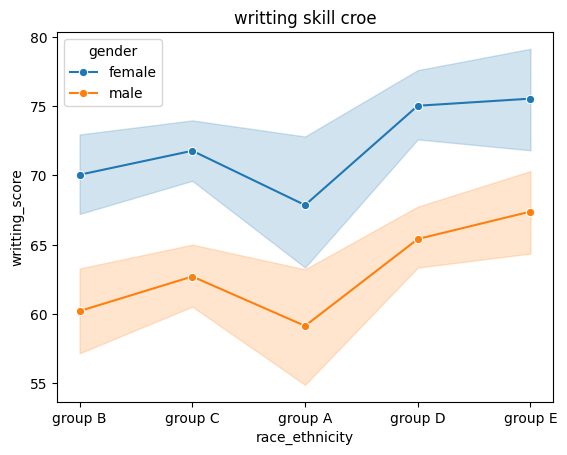

In [26]:
sns.lineplot(x='race_ethnicity',y='writting_score',hue='gender',data=student_data,marker='o')
plt.title('writting skill croe')
plt.show()

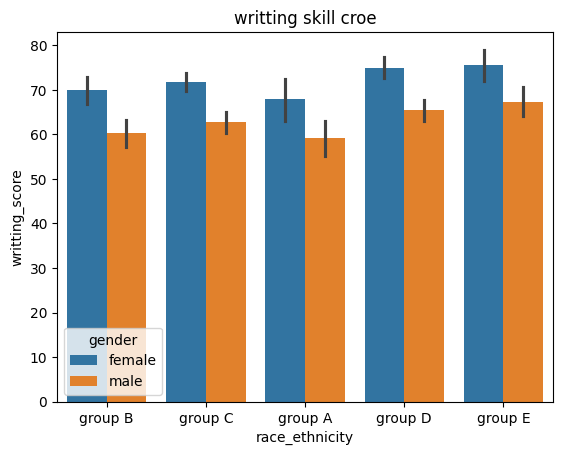

In [27]:
sns.barplot(x='race_ethnicity',y='writting_score',hue='gender',data=student_data)
plt.title('writting skill croe')
plt.show()

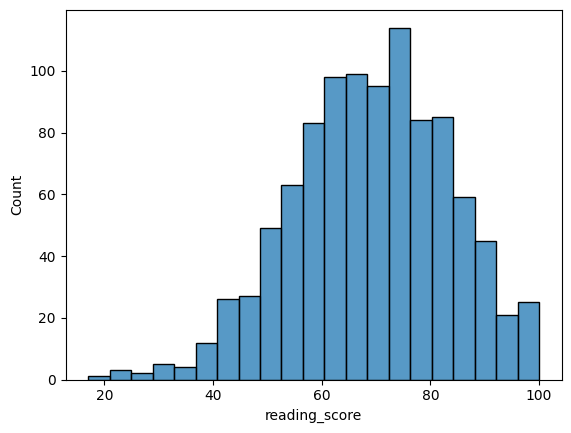

In [28]:
sns.histplot(student_data["reading_score"])
plt.show()

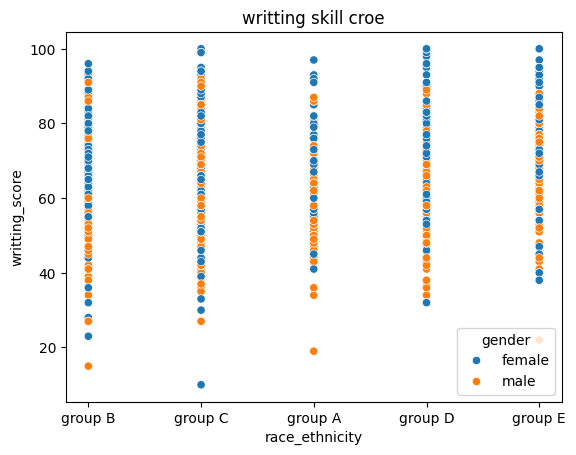

In [29]:
sns.scatterplot(x='race_ethnicity',y='writting_score',hue='gender',data=student_data)
plt.title('writting skill croe')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# Load dataset
df = pd.read_csv("Stud.csv")

# Split features & target
X = df.drop("math_score", axis=1)
y = df["math_score"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing
categorical_features = [
    "gender", "race_ethnicity",
    "parental_level_of_education",
    "lunch", "test_preparation_course"
]
numerical_features = ["reading_score", "writting_score"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

# Model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Save the trained model
with open("student_math_model.pkl", "wb") as f:
    pickle.dump(model, f)

MAE: 4.214763142474852
MSE: 29.09516986671551
RMSE: 5.393993869732845
R2 Score: 0.8804332983749564


In [31]:
!pip install gradio pandas numpy scikit-learn

In [32]:
import gradio as gr
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("Stud.csv")

# Features & target
X = df.drop("math_score", axis=1)
y = df["math_score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing
categorical_features = [
    "gender", "race_ethnicity",
    "parental_level_of_education",
    "lunch", "test_preparation_course"
]
numerical_features = ["reading_score", "writting_score"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train model (NO PICKLE)
model.fit(X_train, y_train)

# Prediction function for Gradio
def predict_math_score(
    gender,
    race_ethnicity,
    parental_level_of_education,
    lunch,
    test_preparation_course,
    reading_score,
    writting_score
):
    input_data = pd.DataFrame([{
        "gender": gender,
        "race_ethnicity": race_ethnicity,
        "parental_level_of_education": parental_level_of_education,
        "lunch": lunch,
        "test_preparation_course": test_preparation_course,
        "reading_score": reading_score,
        "writting_score": writting_score
    }])

    prediction = model.predict(input_data)
    return round(prediction[0], 2)

# Gradio Interface
interface = gr.Interface(
    fn=predict_math_score,
    inputs=[
        gr.Dropdown(["female", "male"], label="Gender"),
        gr.Dropdown(["group A", "group B", "group C", "group D", "group E"], label="Race/Ethnicity"),
        gr.Dropdown([
            "some high school", "high school",
            "some college", "associate's degree",
            "bachelor's degree", "master's degree"
        ], label="Parental Education"),
        gr.Dropdown(["standard", "free/reduced"], label="Lunch Type"),
        gr.Dropdown(["none", "completed"], label="Test Preparation"),
        gr.Slider(0, 100, value=60, label="Reading Score"),
        gr.Slider(0, 100, value=60, label="Writing Score")
    ],
    outputs=gr.Number(label="Predicted Math Score"),
    title="🎓 Student Math Score Prediction",
    description="Gradio App deployed in Google Colab (No Pickle Used)"
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://44b422497af859855a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
